*Organiser guide: All organiser instructions are in italics and will not appear on the participant notebook*

# Welcome to Tractable's ML Classifier Workshop!

[Tractable linkedIn](https://www.linkedin.com/company/tractable/) | [Anifah](https://www.linkedin.com/in/anifah-bhadmus-891a7a116/) | [Martha](https://www.linkedin.com/in/martha-rose-robinson-14567a40/) | [Wei Ann](https://www.linkedin.com/in/weiann-heng/)

Today, we will use industry-standard techniques to build a Machine Learning (ML) Classifier using supervised learning. 

We will use our classifier to classify vehicles by type (car, truck, SUV, van). Supervised learning means that we have test data that we can compare our results to. 

Start with: A dataset that gives us images (input) and labels (teaching signal/feedback). 
End with: An array of 4 numbers for each of those images (i.e. their classification confidences!)

1. Create training, validation, and test data sets
2. Build a data pipeline
3. Explore a pre-trained model
4. Perform feature extraction 

# Before we start
Housekeeping 
* *We will stop between each section to check that everyone is following* 
* *Please ask questions in the chat, our moderators will keep watch*

How to use Jupyter notebook
* *Jupyter notebook is an interactive development and presentation tool.*
* *Each of these boxes is a cell. They can either contain text, or actual code that needs to be run by pressing the run button, like this! (show example)*
* *The sequence you run your cells in matters. So make sure you follow along!*

Quick concepts

## Quick concepts

### Neural network
Source: IBM

*An artificial neural network is a network/circuit of neurons for solving AI problems*
<img src="https://1.cms.s81c.com/sites/default/files/2021-01-06/ICLH_Diagram_Batch_01_03-DeepNeuralNetwork-WHITEBG.png" alt="neural-network" width="500px">

*30 sec explanation about neural network. Inputs and outputs, adjusting the weights and biases between layers of nodes based on training data to make new predictions/classifications about unseen test data*

### Feature 
An individual measureable property/characteristic. These are usually numeric, but we can think of some qualitative examples

[Source](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.nosimpler.me%2Fmachine-learning%2F&psig=AOvVaw1i03lInhxU-kNY9Y2zn59a&ust=1619104334232000&source=images&cd=vfe&ved=0CAoQjRxqFwoTCJiZg-jPj_ACFQAAAAAdAAAAABAJ)
<img src="https://www.nosimpler.me/wp-content/uploads/2016/08/ml-features-1.jpg" alt="feature" width="400px">

### Classifier
A classifier is the thing that we train to classify data into classes. (TODO MORE??)

# Let's get started!

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd
import numpy as np
from workshop_utils import extract_data, get_data

## 1. Create our datasets

### Goal: Create a training, validation, and test dataset from available data

*everything has labels, can be used interchangably*
*Training data - backward propagation
*Validation lets you snoop. Similar to test set, tells you how well you are doing* 
*Test set is completely unseen data. Also not input to the model*

#### Input: 
Stanford Cars196 dataset (Dataset citation: 3D Object Representations for Fine-Grained Categorization. Jonathan Krause, Michael Stark, Jia Deng, Li Fei-Fei. 4th IEEE Workshop on 3D Representation and Recognition, at ICCV 2013 (3dRR-13). Sydney, Australia. Dec. 8, 2013.)

TODO: more information about input: files and labels (0,1,2,3,4 which correspond to car, truck, SUV, van)

*Originally, this dataset has labels for 196 vehicle make model years. We've reduced these to vehicle types, for the sake of simplicity and speed.*

#### Output:
3 datasets (training, validation, test) that generate batches of images and class labels

In [2]:
# Extract compressed dataseet
extract_data()

# Function to convert files into an matrix 2D images and labels.
# Each 2D image is made out of 3 channels 

# TODO: Diagram of how image is made out of 3 channels
def load_data(path, label):
    image = tf.image.decode_jpeg(tf.io.read_file(path), channels=3)
    return image, label

train_dataset = tf.data.Dataset.from_tensor_slices(get_data('train'))
train_dataset = train_dataset.map(load_data)

Data extracted!


*Need to convert images from files to a format a computer can understand: 2D images (like we see) and 3 channels (rgb) pixel values\n",*

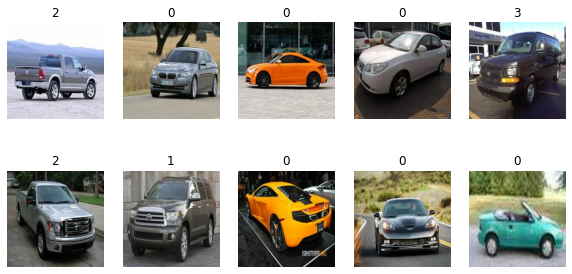

In [3]:
# Let's take a peep at this dataset using our load_data function
fig, axarr = plt.subplots(2, 5, figsize=(10, 5))
axes = axarr.flatten()
for i, (image, label) in enumerate(train_dataset.take(10)):
    ax = axes[i]
    ax.imshow(image.numpy())
    ax.set_title(int(label))
    ax.axis("off")
plt.show()

In [4]:
# Get 3 datasets
train_dataset = tf.data.Dataset.from_tensor_slices(get_data('train')).map(load_data)
validation_dataset = tf.data.Dataset.from_tensor_slices(get_data('val')).map(load_data)
test_dataset = tf.data.Dataset.from_tensor_slices(get_data('test')).map(load_data)


# Batch size = number of training exmaples utilized in one iteration. Important to not over/underfit
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().batch(batch_size).prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().batch(batch_size).prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().batch(batch_size).prefetch(buffer_size=AUTOTUNE)

image_batch, label_batch = next(iter(train_dataset))
print(image_batch.shape)
print(label_batch.shape)

(32, 160, 160, 3)
(32,)


*TODO: Explain shape of data: image: (32, 160, 160, 3) is a matrix of 32 images in a batch, 160x160 pixels of 3 visual channels each
(32) is the number of labels per batch*

## 2. Build a data pipeline

### Goal: Create augmented data set to improve training

#### Input: 
Training dataset from previous section

#### Output:
Larger training data set with augmentation

In [5]:
# We will be using tensorflow library
# TODO: Link preprocessing module docs
from tensorflow.keras.layers.experimental import preprocessing
# CODE-ALONG CHECKPOINT 1 - use tf.keras to pre-process images
data_augmentation = tf.keras.Sequential([
  preprocessing.RandomFlip('horizontal'),
  preprocessing.RandomRotation(0.2),
])

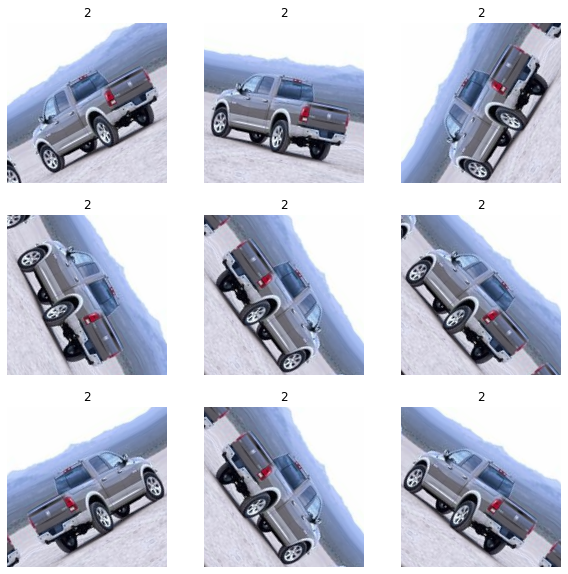

In [6]:
for images, labels in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    first_image = images[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(
            tf.expand_dims(first_image, 0), training=True
        )
        plt.imshow(augmented_image[0].numpy().astype("int32"))
        plt.title(int(labels[0]))
        plt.axis("off")

## 3. How does a pre-trained model perform?

### Goal: Test how good Google's pre-trained MobileNet V2 model is at classifying vehicles out of the box

This is an example of how real world AI applications are built - use pre-trained model rather than building from scratch. Won't go into too much detail

*This is equivalent to a toddler that has learned 1000 words*
*Don't go through in detail -- just show that the pre-trained model already has some ability to do our task*


#### Input: 
1. Google's MobileNet V2 model, which is pre-trained on ImageNet dataset with a wide variety of categories (not just vehicles, but things like food, people, etc)
2. Our training Cars196 dataset

#### Output:

The images of each vehicle and what MobileNet thinks this image is. (Remember that this model is general, so will not output 0,1,2,3 like you might expect.)

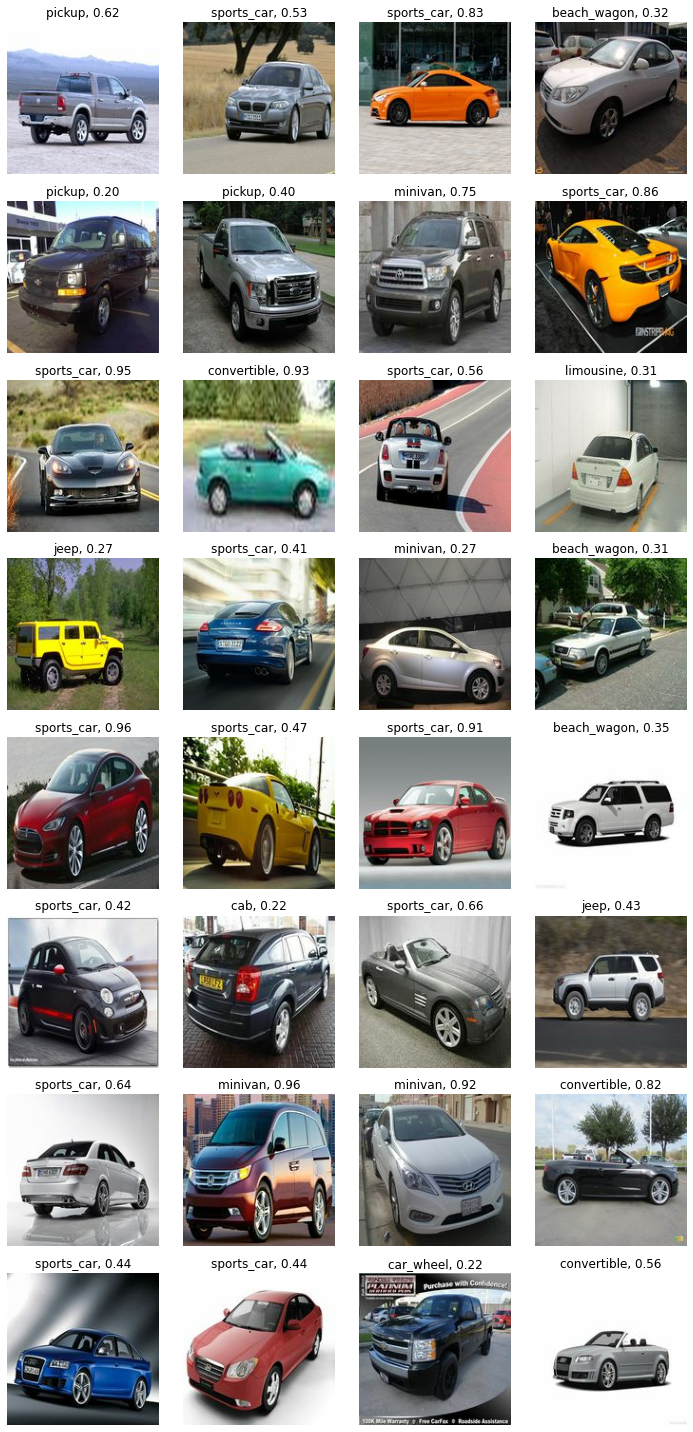

In [7]:
IMG_SHAPE = (160, 160, 3)

# Prepare data to suit MobileNet's expected input
# Weights trained on imagenet
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
mobilenet_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, weights='imagenet')

# Create a tf.Keras model based on our inputs and MobileNet
input_layer = tf.keras.Input(shape=(160, 160, 3))
preprocessed_input_layer = preprocess_input(input_layer)
mobilenet_layer = mobilenet_model(preprocessed_input_layer)
model = tf.keras.Model(input_layer, mobilenet_layer)

# Get model's predictions on our previously created image batch
prediction_batch = model(image_batch)

# Decode these predictions into human-readable class names (from imagenet)
decoded_predictions = tf.keras.applications.mobilenet_v2.decode_predictions(prediction_batch.numpy(), top=1)

# Numbers are confidence scores 
# Point out ones that are wrong, gets the right one and but low confidence
# MobileNet is actually quite good at recognising cars. Could have labelled them as mashed potato, or a cat. 
# We can find tune this, but the power of using this pre-trained network is we don't need to teach it how to "see"
#note down the 2 examples of correct and wrong predictions
fig, axarr = plt.subplots(8, 4, figsize=(10,20))
axes = axarr.flatten()
for i, (image, prediction) in enumerate(zip(image_batch, decoded_predictions)):
    ax = axes[i]
    ax.imshow(image.numpy())
    top_label = prediction[0][1]
    score = prediction[0][2]
    ax.set_title(f'{top_label}, {score:.2f}')
    ax.axis('off')
plt.tight_layout()
plt.show()

## 4. Feature extraction

### Goal: Use an existing model to extract features from our images, and transfer that knowledge to our new task

*Use mobilenet v2 to extract useful visual features and build a new classifier on top*

### Step by step runthrough:
1. Cut the top off the pre-trained model MobileNet V2 and use it to extract visual features
2. Add a new classifier head on top that has the outputs we need for our task (car, truck, SUV, van)
3. Connect this to our data pipeline to build a keras model ready for training

#### Input: 
The Mobilenet V2 pre-trained model, and our data pipeline we constructed earlier.
#### Output
A new model architecture designed for our task, that leverages what the pretrained mobilenet has already learned.
<img src="feature_extraction_methodology.jpg" alt="Using an existing model as a feature extractor" width="1000px">

#### Step 1: Cut the top off the pre-trained model MobileNet V2 and use it to extract visual features

*Remove the "top" of the pre-trained model - meaning that it will not produce final classifications, but provide us insights about features of each datapoint. Make sure to freeze the weights.

In [8]:
IMG_SHAPE = (160, 160, 3)
# CODE-ALONG CHECKPOINT 2
# base_model = ?
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
# freeze the weights
base_model.trainable = False

In [9]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 80, 80, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

*`base_model` is our feature extractor. It converts a 160x160x3 image into a 5x5x1280 block of features.*

In [10]:
image_batch, label_batch = next(iter(train_dataset))

# CODE-ALONG CHECKPOINT 3
# feature_batch = ?
# print(?)
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


#### STEP 2 - Add a new classifier head on top that has the outputs we need for our task (car, truck, SUV, van)

First, let's create a layer to average over the 5x5 spatial locations to create a single 1280 vector per image:

In [11]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


Next, create a fully-connected layer of neurons as our outputs for our 4 classes. Each output neuron should be connected to each of the 1280 neurons in the previous layer.

In [12]:
# CODE-ALONG CHECKPOINT 4 - Create a fully connected output layer
prediction_layer = tf.keras.layers.Dense(4, activation='softmax')
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 4)


#### STEP 3 - Connect this to our data pipeline to build a keras model ready for training
Now let's connect all our parts together to build our model.

In [13]:
# CODE-ALONG CHECKPOINT 5 - Define our model
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [14]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.truediv_1 (TFOpLambd (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.subtract_1 (TFOpLamb (None, 160, 160, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0   

In [15]:
model.trainable_variables

[<tf.Variable 'dense/kernel:0' shape=(1280, 4) dtype=float32, numpy=
 array([[ 0.06064979, -0.04475132,  0.03652571, -0.04418838],
        [-0.05210151,  0.00599071,  0.04800526, -0.00773465],
        [-0.06650514,  0.01966371, -0.0588855 , -0.06225028],
        ...,
        [ 0.03870591,  0.04942212, -0.03405186, -0.01103556],
        [-0.02731129, -0.02871441,  0.04263549, -0.06140421],
        [ 0.04621516,  0.01579036, -0.05526002, -0.06712029]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>]

## 5. Training

### Goal: Use an existing model to extract features from our images, and transfer that knowledge to our new task

*Use our training data and a learning algorithm to find a good set of weights and biases that help our model solve the task*

### Step by step runthrough:
1. Compile our model for training, selecting relevant hyperparameters
2. Train our model for 10 epochs
3. Evaluate the performance of our new model on unseen data (the test set)

#### Input: 
The model architecture we just constructed, our training and validation datasets
#### Output
A model that has learned how to perform our task

## Quick concepts

### Loss
A measure of how bad a given prediction is. If the prediction is perfect, the loss is zero, otherwise we get larger losses. There are many loss functions to choose from, which one is most appropriate depends on your task.

### Optimizer
When we train a model, we want to find the weights and biases that **minimize the loss**. We can do that using variations on stocastic gradient descent.

<img src="optimisation_demo.gif" alt="optimisation" width="700px">

[Source](https://github.com/lilipads/gradient_descent_viz)

### Metrics
Statistical measures or scores we can use to monitor and assess model performance. Again, we have many options to choose from here!

#### STEP 1 - Compile our model for training, selecting relevant hyperparameters

In [16]:
# CODE-ALONG CHECKPOINT 6 - Compile our model
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
# CODE-ALONG CHECKPOINT 7 - Evaluate prior to training
# With no training
loss0, accuracy0 = model.evaluate(validation_dataset)

64/64 [==============================] - 13s 186ms/step - loss: 1.8478 - accuracy: 0.1450


In [18]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 1.85
initial accuracy: 0.15


#### STEP 2 - Train our model for 10 epochs

In [19]:
# CODE-ALONG CHECKPOINT 8 - Train our model
# Now is a very good time to talk about what's happening + how weights
# are updated.
initial_epochs = 10
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/10
191/191 [==============================] - 51s 259ms/step - loss: 1.1263 - accuracy: 0.5817 - val_loss: 0.8186 - val_accuracy: 0.6881
Epoch 2/10
191/191 [==============================] - 49s 257ms/step - loss: 0.8400 - accuracy: 0.6868 - val_loss: 0.6845 - val_accuracy: 0.7205
Epoch 3/10
191/191 [==============================] - 49s 258ms/step - loss: 0.7548 - accuracy: 0.7122 - val_loss: 0.6042 - val_accuracy: 0.7564
Epoch 4/10
191/191 [==============================] - 49s 258ms/step - loss: 0.7154 - accuracy: 0.7271 - val_loss: 0.5520 - val_accuracy: 0.7814
Epoch 5/10
191/191 [==============================] - 49s 258ms/step - loss: 0.6711 - accuracy: 0.7402 - val_loss: 0.5131 - val_accuracy: 0.8026
Epoch 6/10
191/191 [==============================] - 50s 260ms/step - loss: 0.6477 - accuracy: 0.7436 - val_loss: 0.4873 - val_accuracy: 0.8129
Epoch 7/10
191/191 [==============================] - 49s 258ms/step - loss: 0.6077 - accuracy: 0.7597 - val_loss: 0.4686 - val_ac

#### STEP 3 - Evaluate the performance of our new model on unseen data (the test set)

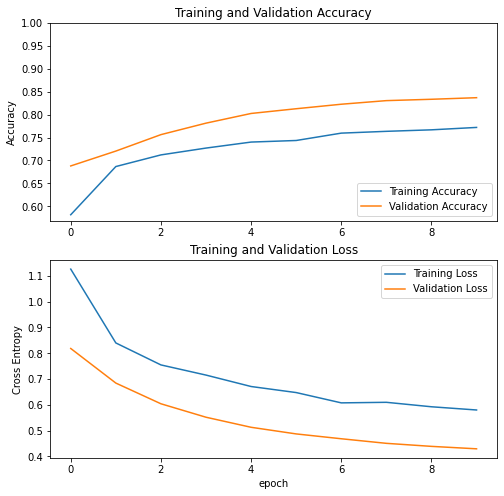

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [21]:
#Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

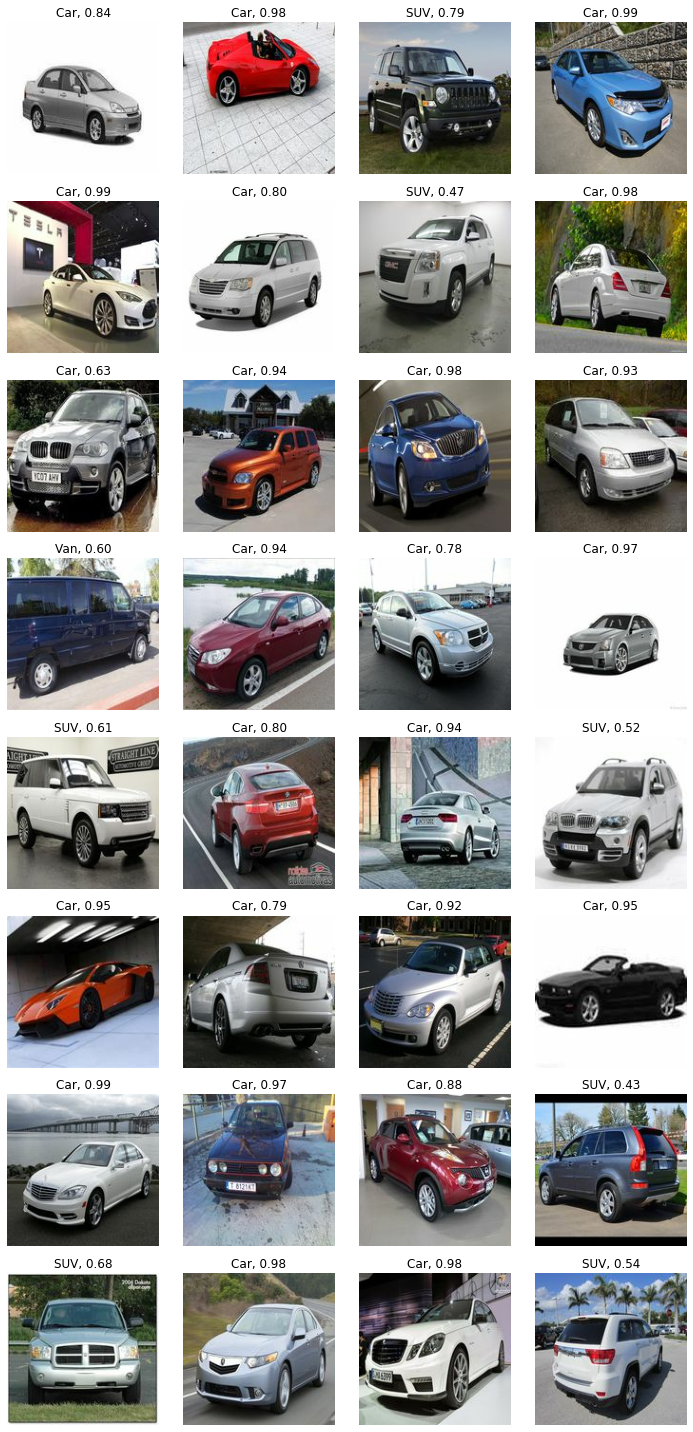

In [22]:
class_names = ['Car', 'SUV', 'Truck', 'Van']
fig, axarr = plt.subplots(8, 4, figsize=(10,20))
axes = axarr.flatten()
for i, (image, prediction) in enumerate(zip(image_batch, predictions)):
    ax = axes[i]
    ax.imshow(image)
    top_label = np.argmax(prediction)
    score = prediction[top_label]
    ax.set_title(f'{class_names[top_label]}, {score:.2f}')
    ax.axis('off')
plt.tight_layout()
plt.show()

# Fine tuning!

This is your challenge.

In feature extraction, we were training a small number of new layers on top of the existing MobileNetV2 base model. The weights of that base model were not updated during training.

One way to increase performance further is to "fine-tune" the model, by training the weights of the top layers of the base model alongside our classification layer. This processes should force the weights of the base model to move from defining generic feature maps to features more specific for our task.

(Note, if you try this without first training the top-level classifier with the base model set to non-trainable, the graident updates will be very large (because the classifier starts off with random weights) and your base model is likely to forget what it has already learned).

There are quite a few hyperparameters to change here -- how many layers to allow fine-tuning for, what learning rate to use, etc. We've set you up with a starting point, but play around and see how much you can improve performance with fine-tuning. We will have a prize for the best improvement!

Un-freeze the top layers of the model
All you need to do is unfreeze the base_model and set the bottom layers to be un-trainable. Then, you should recompile the model (necessary for these changes to take effect), and resume training.

In [23]:
base_model.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable =  False

Number of layers in the base model:  154


Compile the model

In [24]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              metrics=['accuracy'])

model.summary()
len(model.trainable_variables)


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.truediv_1 (TFOpLambd (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.subtract_1 (TFOpLamb (None, 160, 160, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0   

56

Continue training the model

In [25]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 10/20
191/191 [==============================] - 77s 388ms/step - loss: 0.5607 - accuracy: 0.7804 - val_loss: 0.3789 - val_accuracy: 0.8482
Epoch 11/20
191/191 [==============================] - 76s 400ms/step - loss: 0.4947 - accuracy: 0.8069 - val_loss: 0.3689 - val_accuracy: 0.8649
Epoch 12/20
191/191 [==============================] - 76s 397ms/step - loss: 0.4948 - accuracy: 0.8120 - val_loss: 0.3324 - val_accuracy: 0.8684
Epoch 13/20
191/191 [==============================] - 76s 397ms/step - loss: 0.4301 - accuracy: 0.8268 - val_loss: 0.3265 - val_accuracy: 0.8752
Epoch 14/20
191/191 [==============================] - 79s 414ms/step - loss: 0.4256 - accuracy: 0.8338 - val_loss: 0.2979 - val_accuracy: 0.8890
Epoch 15/20
191/191 [==============================] - 70s 366ms/step - loss: 0.3832 - accuracy: 0.8523 - val_loss: 0.2964 - val_accuracy: 0.8831
Epoch 16/20
191/191 [==============================] - 71s 373ms/step - loss: 0.3794 - accuracy: 0.8503 - val_loss: 0.2718 -

Results of fine tuning

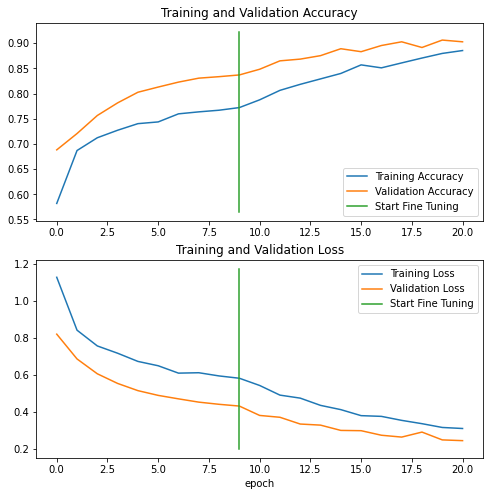

In [26]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Evaluation and prediction

In [27]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

252/252 [==============================] - 51s 201ms/step - loss: 0.2448 - accuracy: 0.9087
Test accuracy : 0.9087178111076355


In [28]:
#Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

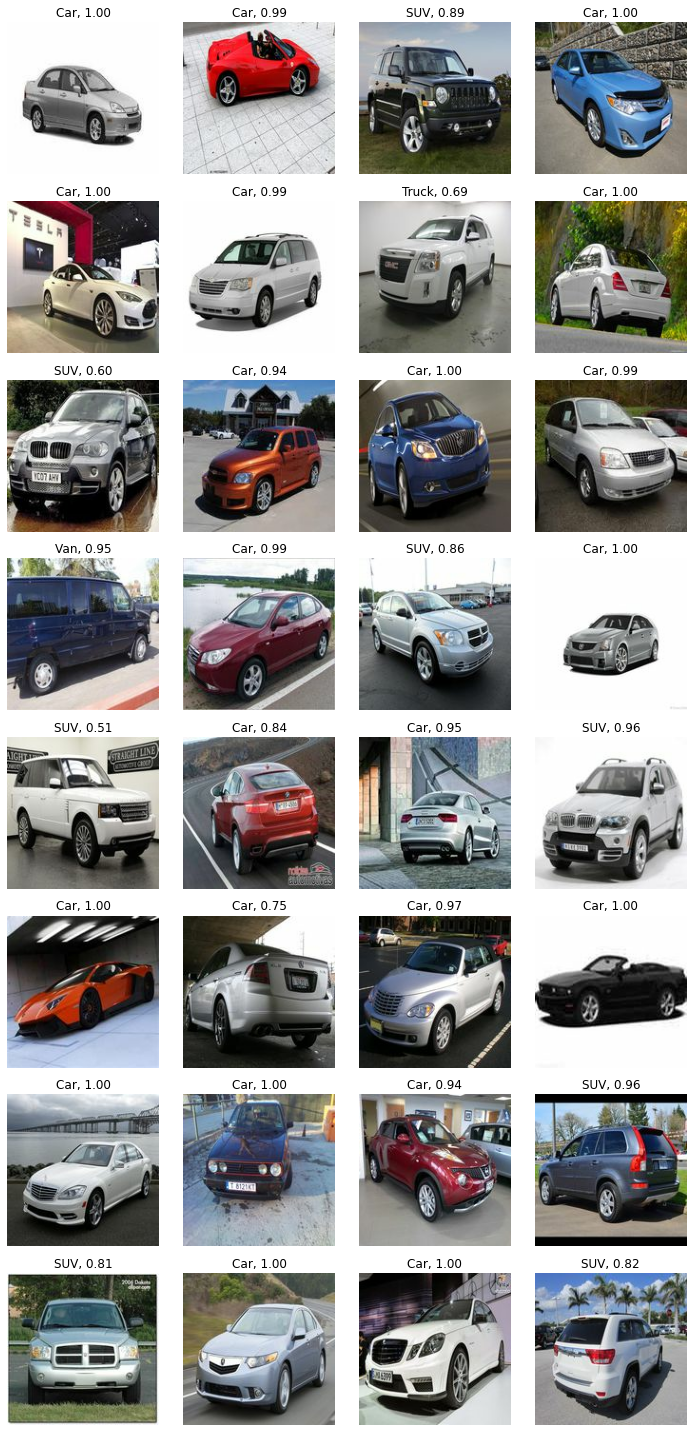

In [29]:
class_names = ['Car', 'SUV', 'Truck', 'Van']
fig, axarr = plt.subplots(8, 4, figsize=(10,20))
axes = axarr.flatten()
for i, (image, prediction) in enumerate(zip(image_batch, predictions)):
    ax = axes[i]
    ax.imshow(image)
    top_label = np.argmax(prediction)
    score = prediction[top_label]
    ax.set_title(f'{class_names[top_label]}, {score:.2f}')
    ax.axis('off')
plt.tight_layout()
plt.show()

# 5. Fine tuning Challenge!

This is your challenge.

In feature extraction, we were training a small number of new layers on top of the existing MobileNetV2 base model, and we froze the weights of that base model so that they were not updated during training.

One way to increase performance further is to "fine-tune" the model by training the weights of the top layers of the base model alongside our classification layer. 

This process should force the weights of the base model to move from defining generic feature maps to features more specific for our task.

*(Note, if you try this without first training the top-level classifier with the base model set to non-trainable, the graident updates will be very large (because the classifier starts off with random weights) and your base model is likely to forget what it has already learned).*

There are quite a few hyperparameters to change here -- how many layers to allow fine-tuning for, what learning rate to use, etc. We've set you up with a starting point, but play around and see how much you can improve performance with fine-tuning. We will have a prize for the best improvement!